In [1]:
from google.colab import drive

drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [2]:
cd /content/gdrive/MyDrive/GAN/syllable2/syllable

/content/gdrive/MyDrive/GAN/syllable2/syllable


In [3]:
from os import listdir
from os.path import isfile, join
import numpy
import cv2

mypath='/content/gdrive/MyDrive/GAN/syllable2/syllable'
onlyfiles = [ f for f in listdir(mypath) if isfile(join(mypath,f)) ]


In [6]:
#imread로 읽기dd
images = numpy.empty(len(onlyfiles),dtype = object)
for n in range(0,len(onlyfiles)):
  images[n] = cv2.imread(join(mypath,onlyfiles[n]))

In [7]:
# array로 변환된 이미지 크기
len(images)

60839

In [8]:
images.shape

(60839,)

In [10]:
print(images[1])

[[[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 ...

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]]


In [11]:
#size 맞추기
for i in range(len(images)):
  images[i] = cv2.resize(images[i], (32,32))

In [12]:
#size 확인
images[1].shape

(32, 32, 3)

In [73]:
# 3D vector로 변환
import numpy as np

width, height, channel = 32, 32, 3 # 이미지 사이즈 32*32 pixel
X=np.empty((len(images),32,32,3))

for i in range(len(images)):
  X[i]=images[i]

print(X.shape)

(60839, 32, 32, 3)


In [121]:
# X 저장
np.save('./saved_X', X)

In [74]:
# image pixel normalization [0,255] -> [-1,1]

X = (X - 127.5) / 127.5

print(X[5])

[[[1. 1. 1.]
  [1. 1. 1.]
  [1. 1. 1.]
  ...
  [1. 1. 1.]
  [1. 1. 1.]
  [1. 1. 1.]]

 [[1. 1. 1.]
  [1. 1. 1.]
  [1. 1. 1.]
  ...
  [1. 1. 1.]
  [1. 1. 1.]
  [1. 1. 1.]]

 [[1. 1. 1.]
  [1. 1. 1.]
  [1. 1. 1.]
  ...
  [1. 1. 1.]
  [1. 1. 1.]
  [1. 1. 1.]]

 ...

 [[1. 1. 1.]
  [1. 1. 1.]
  [1. 1. 1.]
  ...
  [1. 1. 1.]
  [1. 1. 1.]
  [1. 1. 1.]]

 [[1. 1. 1.]
  [1. 1. 1.]
  [1. 1. 1.]
  ...
  [1. 1. 1.]
  [1. 1. 1.]
  [1. 1. 1.]]

 [[1. 1. 1.]
  [1. 1. 1.]
  [1. 1. 1.]
  ...
  [1. 1. 1.]
  [1. 1. 1.]
  [1. 1. 1.]]]


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping i

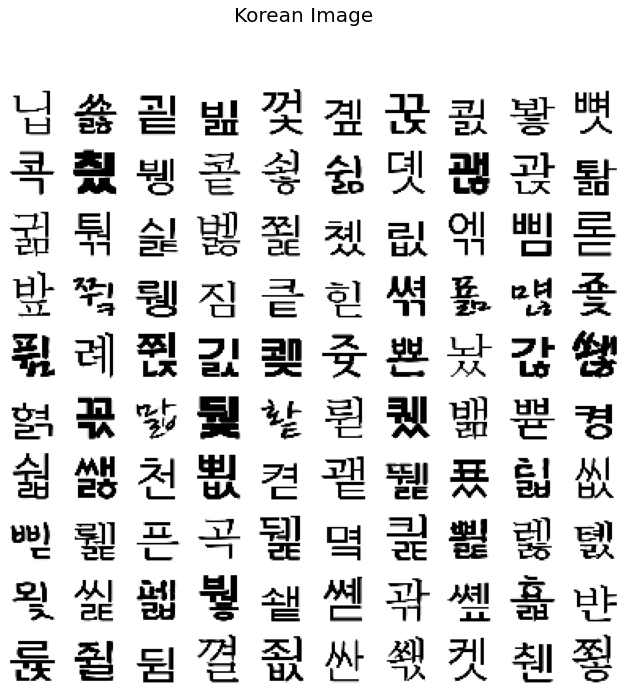

In [75]:
# 이미지로 시각화해보기
 
import matplotlib.pyplot as plt

plt.figure(figsize=(11,11))
    
i = 1
for image in X:
    plt.subplot(10, 10, i) #(10*10) 총 100칸
    plt.imshow(image, cmap='gray') # 흑백 이미지
    plt.axis('off')
    i+=1
    if i > 100: break

plt.suptitle("Korean Image", fontsize = 20)
plt.show()

In [85]:
# 2-5. 학습 데이터 batch 준비
import tensorflow as tf
from tensorflow.keras import layers

BATCH_SIZE = 64

# Input dataset + image randum shuffle
train_dataset = tf.data.Dataset.from_tensor_slices(X).shuffle(X.shape[0]).batch(BATCH_SIZE)

print(train_dataset)

<BatchDataset shapes: (None, 32, 32, 3), types: tf.float64>


# **Part2. 생성자 모델(Generator Model)**

In [19]:
# 3-1. Generator 모델 네트워크 구성

def build_generator_model():
    model = tf.keras.Sequential() # Keras 모델 생성

    model.add(layers.Dense(1024, input_dim=100, use_bias=False))
    model.add(layers.BatchNormalization())
    model.add(layers.LeakyReLU())
    
    model.add(layers.Dense(8*8*128, use_bias=False))
    model.add(layers.BatchNormalization())
    model.add(layers.LeakyReLU())
    
    # Resahpe (8*8)
    model.add(layers.Reshape((8, 8 ,128)))  
    
    model.add(layers.Conv2DTranspose(128, (5, 5), 
                                    strides=(1, 1), padding='same', use_bias=False))
    model.add(layers.BatchNormalization()) 
    model.add(layers.LeakyReLU())
    
    # (8*8) -> (16*16)
    model.add(layers.Conv2DTranspose(64, (5, 5), 
                                    strides=(2, 2), padding='same', use_bias=False))
    model.add(layers.BatchNormalization())
    model.add(layers.LeakyReLU())
    
    # (16*16) -> (32*32-*3)
    model.add(layers.Conv2DTranspose(3, (5, 5), 
                                    strides=(2, 2), padding='same', activation='tanh'))
    assert model.output_shape == (None, 32, 32, 3)

    return model

In [20]:
# 3-2. 생성자 모델 생성

generator = build_generator_model()
generator.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 1024)              102400    
_________________________________________________________________
batch_normalization (BatchNo (None, 1024)              4096      
_________________________________________________________________
leaky_re_lu (LeakyReLU)      (None, 1024)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 8192)              8388608   
_________________________________________________________________
batch_normalization_1 (Batch (None, 8192)              32768     
_________________________________________________________________
leaky_re_lu_1 (LeakyReLU)    (None, 8192)              0         
_________________________________________________________________
reshape (Reshape)            (None, 8, 8, 128)         0

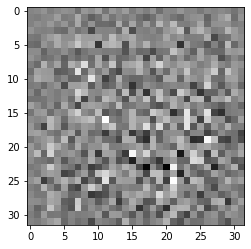

In [21]:
# 3-3. 학습되지 않은 생성자 모델이 만든 이미지

noise = tf.random.normal([1, 100]) #얘가 z역할,,?
generated_image = generator(noise, training=False)

plt.imshow(generated_image[0, :, :, 0], cmap='gray')

# **Part3. 판별자 모델(Discriminator Model)**

In [22]:
# 4-1. Discriminator 모델 네트워크 구성

def build_discriminator_model():

    model = tf.keras.Sequential()
    
    model.add(layers.Conv2D(64, (5, 5), strides=2, padding='same', 
                       input_shape=[32, 32, 3])) # input image size
    model.add(layers.LeakyReLU(0.2))
    model.add(layers.Dropout(0.3))

    model.add(layers.Conv2D(128, (5, 5), strides=2, padding='same'))
    model.add(layers.LeakyReLU(0.2))
    
    model.add(layers.Flatten())
    
    model.add(layers.Dense(256))
    model.add(layers.LeakyReLU(0.2))
    model.add(layers.Dropout(0.3))

    model.add(layers.Dense(1))
    
    return model

In [23]:
# 4-2. 판별자 모델 생성

discriminator = build_discriminator_model()
discriminator.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 16, 16, 64)        4864      
_________________________________________________________________
leaky_re_lu_4 (LeakyReLU)    (None, 16, 16, 64)        0         
_________________________________________________________________
dropout (Dropout)            (None, 16, 16, 64)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 8, 8, 128)         204928    
_________________________________________________________________
leaky_re_lu_5 (LeakyReLU)    (None, 8, 8, 128)         0         
_________________________________________________________________
flatten (Flatten)            (None, 8192)              0         
_________________________________________________________________
dense_2 (Dense)              (None, 256)              

In [24]:
# 4-3. 학습되지 않은 판별자의 결과

predicted = discriminator(generated_image)
print(predicted)

tf.Tensor([[-0.00367294]], shape=(1, 1), dtype=float32)


# **Part4. Optimizer + Loss function**

In [25]:
# 5-1. Optimizer 생성

# 생성자용
generator_optimizer = tf.keras.optimizers.Adam(1e-4)
# 판별자용
discriminator_optimizer = tf.keras.optimizers.Adam(1e-4)

In [26]:
# 5-2. BinaryCrossentropy for minMax

cross_entropy = tf.keras.losses.BinaryCrossentropy(from_logits=True)

In [27]:
# 5-2. Generator Loss 함수

# 생성자 모델 목표 : 
# 판별자 모델이 가짜 이미지를 판별했을 때 판별 값이 1에 가까워지도록
def generator_loss(fake_output):
    return cross_entropy(tf.ones_like(fake_output), fake_output) # 1과 가짜 이미지를 판별 값 비교

In [28]:
# 5-3. Discriminator Loss 함수

# 판별자 모델 목표 :
# 1. 진짜 이미지를 판별했을 때 판별 값이 1에 가까워지도록
# 2. 가짜 이미지를 판별했을 때 판별 값이 0에 가까워지도록
def discriminator_loss(real_output, fake_output):
    real_loss = cross_entropy(tf.ones_like(real_output), real_output) # 1. 1과 진짜 이미지 판별 값 비교
    fake_loss = cross_entropy(tf.zeros_like(fake_output), fake_output) # 2. 0과 가짜 이미지 판별 값 비교
    total_loss = real_loss + fake_loss
    return total_loss

In [82]:
# 6-1. 학습 값 설정

EPOCHS = 300
noise_dim = 100

In [87]:
@tf.function
def train_step(images):
    # 생성자 input noise
    noise = tf.random.normal([BATCH_SIZE, noise_dim])
    # Gradient descent 계산 및 파라미터 업데이트
    with tf.GradientTape() as gen_tape, tf.GradientTape() as disc_tape:
      generated_images = generator(noise, training=True)

      real_output = discriminator(images, training=True) # 진짜 이미지를 봤을 때의 판별 값
      fake_output = discriminator(generated_images, training=True) # 가짜 이미지를 봤을 때의 판별 값

      gen_loss = generator_loss(fake_output)
      disc_loss = discriminator_loss(real_output, fake_output)

    gradients_of_generator = gen_tape.gradient(gen_loss, generator.trainable_variables)
    gradients_of_discriminator = disc_tape.gradient(disc_loss, discriminator.trainable_variables)

    generator_optimizer.apply_gradients(zip(gradients_of_generator, generator.trainable_variables))
    discriminator_optimizer.apply_gradients(zip(gradients_of_discriminator, discriminator.trainable_variables))


In [31]:
 #6-4. 테스트 노이즈 시각화 함수

test_noise = tf.random.normal([100, noise_dim]) # 학습 시각화를 위한 테스트 노이즈



def show_generated_images(epoch):
    images = generator.predict(test_noise)
    images = 0.5 * images + 0.5
    
    plt.figure(figsize=(11,11))
    
    i=1
    for image in images:
        plt.subplot(10, 10, i)
        plt.imshow(image, cmap='gray')
        plt.axis('off')
        i+=1

    plt.suptitle("Generated Images on EPOCH: %s" % epoch, fontsize = 25)
    plt.show()

In [94]:
# 6-4. 학습 코드


def train(dataset, epochs):
  for epoch in range(epochs): # 전체 데이터 학습 반복 횟수(300)
  
    for image_batch in dataset: # batch 학습(64)
      train_step(image_batch)

    print("%s epochs trained" % epoch)

    if epoch % 5 == 0: # 5번째 에포크 마다 이미지 시각화
        show_generated_images(epoch)
  
 
  return generator



In [71]:
train_dataset

<BatchDataset shapes: (None, 32, 32, 3), types: tf.float64>

0 epochs trained


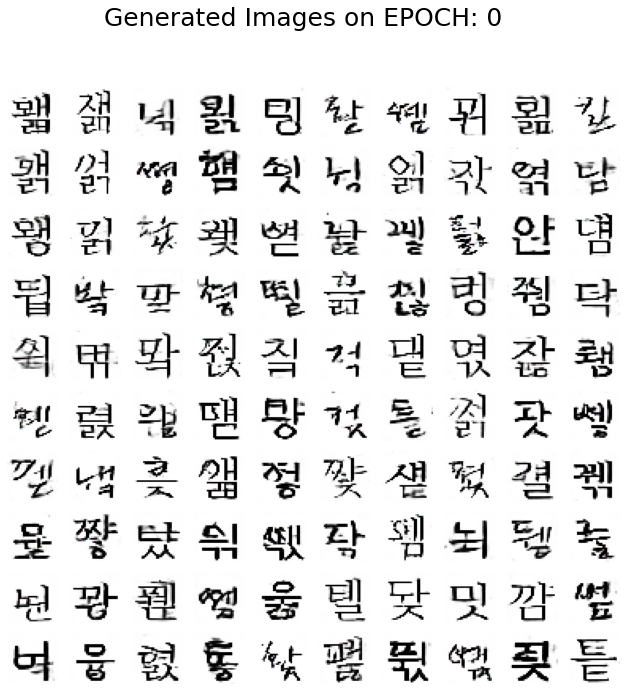

1 epochs trained
2 epochs trained
3 epochs trained
4 epochs trained
5 epochs trained


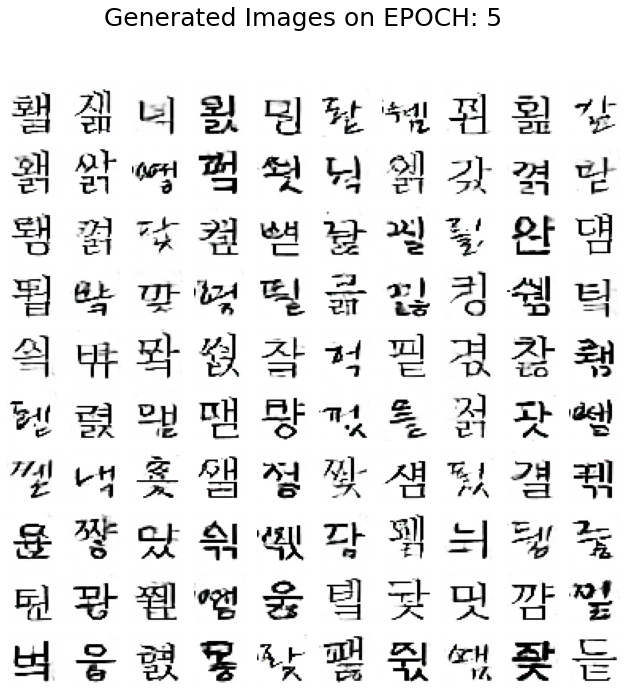

6 epochs trained
7 epochs trained
8 epochs trained
9 epochs trained
10 epochs trained


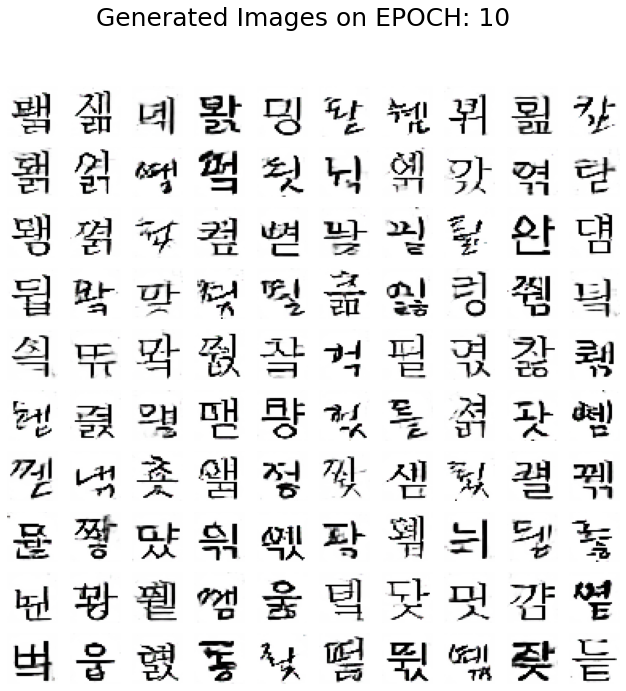

11 epochs trained
12 epochs trained
13 epochs trained
14 epochs trained
15 epochs trained


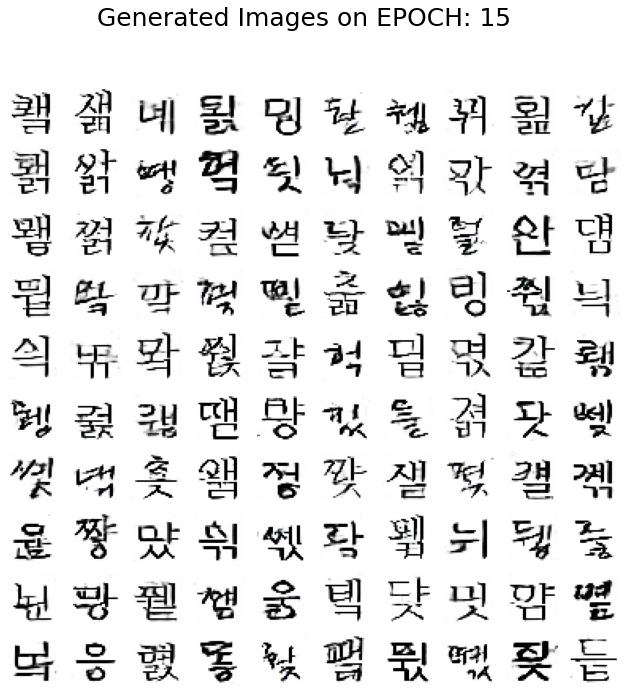

16 epochs trained
17 epochs trained
18 epochs trained
19 epochs trained
20 epochs trained


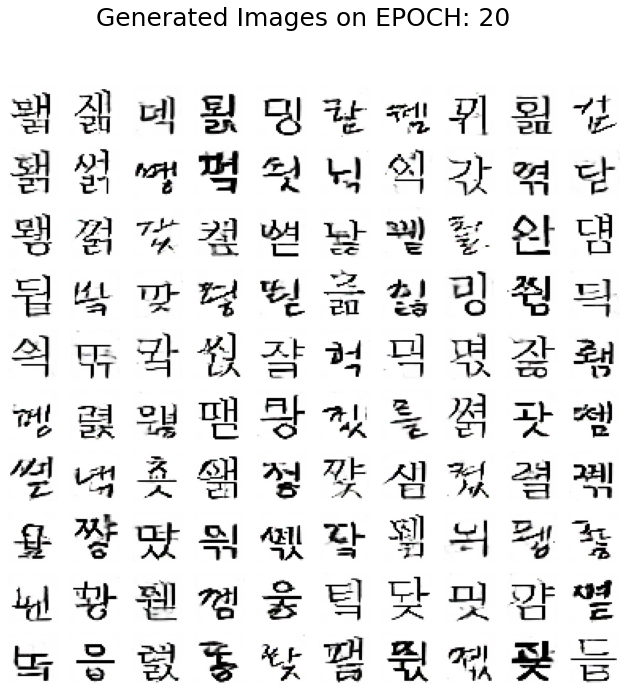

21 epochs trained
22 epochs trained
23 epochs trained
24 epochs trained
25 epochs trained


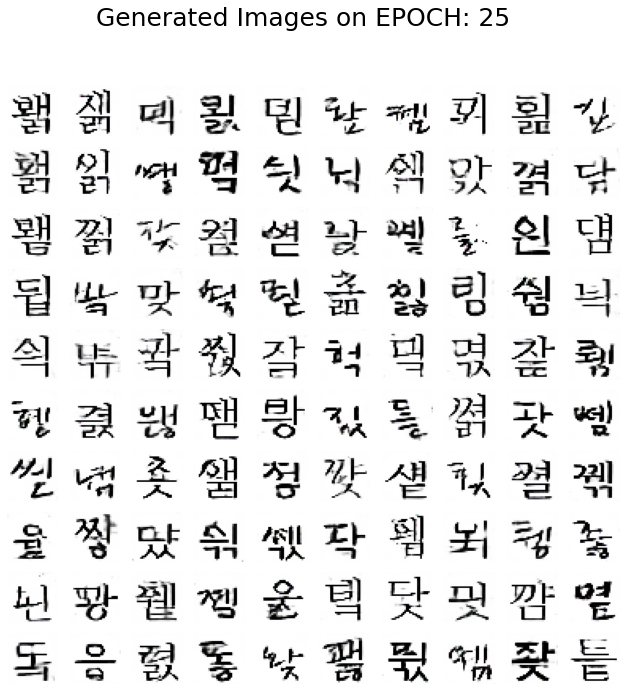

26 epochs trained
27 epochs trained
28 epochs trained
29 epochs trained
30 epochs trained


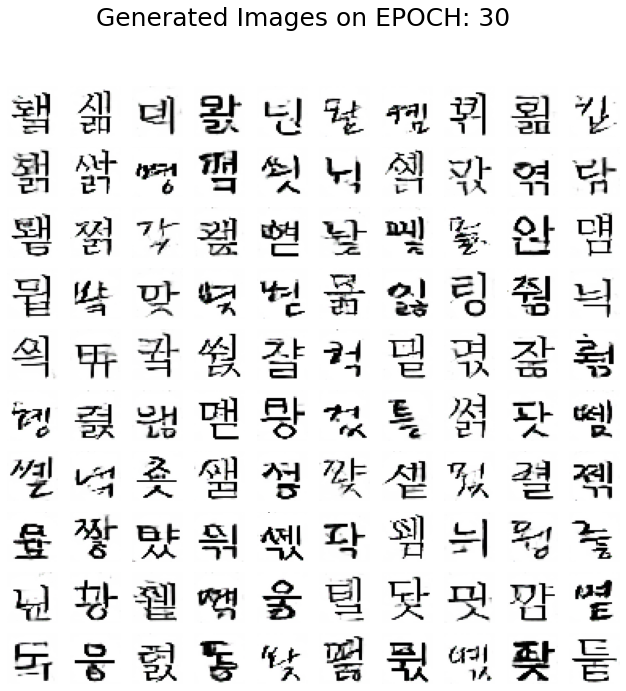

KeyboardInterrupt: ignored

In [95]:
# 6-5. 학습 시작!
model = train(train_dataset, EPOCHS)

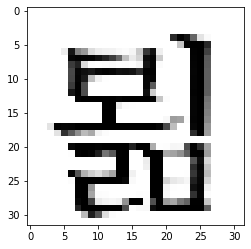

In [148]:
noise = tf.random.normal([1, 100]) #얘가 z역할인가!
generated_image = model(noise, training=False)

plt.imshow(generated_image[0, :, :, 0], cmap='gray')

In [130]:
#test data 불러오기

predictions = model(y, training=False)

fig = plt.figure(figsize=(4,4))

for i in range(predictions.shape[0]):
    plt.subplot(4, 4, i+1)
    plt.imshow(predictions[i, :, :, 0] * 127.5 + 127.5, cmap='gray')
    plt.axis('off')

plt.savefig('image_at_epoch_{:04d}.png'.format(epoch))
plt.show()

ValueError: ignored